<a href="https://colab.research.google.com/github/sayoneenandi/PlayerNHL/blob/main/playeranalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

processing
Original 'DateTime' values:
DateTime
2023-08-05 21:30:00      0
2023-08-05 21:40:00    731
2023-08-05 21:50:00    806
2023-08-05 22:00:00    787
2023-08-05 22:10:00    855
Name: New Visits, dtype: int64


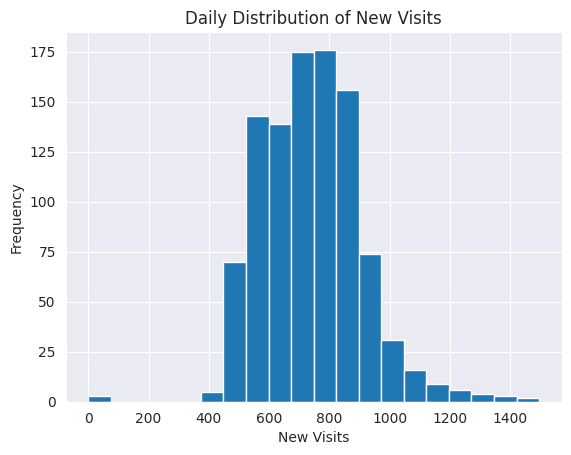

                     Avg Playtime  Players  Like Percent  New Favorites  \
DateTime                                                                  
2023-08-05 21:30:00       4.08060      324     85.154484              0   
2023-08-05 21:40:00       3.93659      298     85.154484              1   
2023-08-05 21:50:00       4.30052      332     85.154484              0   
2023-08-05 22:00:00       4.60836      353     85.154484              1   
2023-08-05 22:10:00       4.24528      360     85.148515              2   
...                           ...      ...           ...            ...   
2023-08-12 21:40:00       3.82313      281     85.267764              0   
2023-08-12 21:50:00       4.51863      291     85.267764              0   
2023-08-12 22:00:00       3.51051      284     85.269299              2   
2023-08-12 22:10:00       4.49695      295     85.269299              0   
2023-08-12 22:20:00       3.90935      276     85.269299              1   

                     New

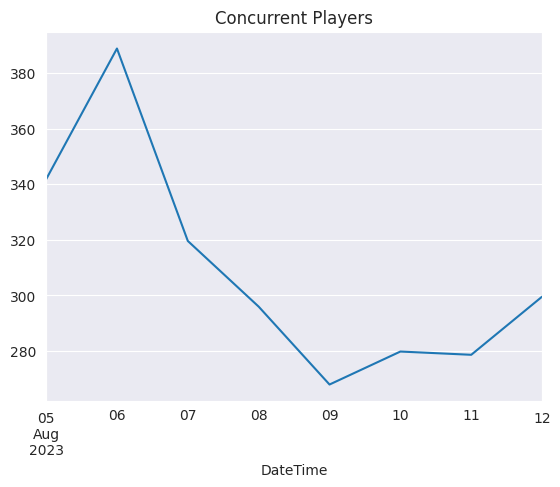

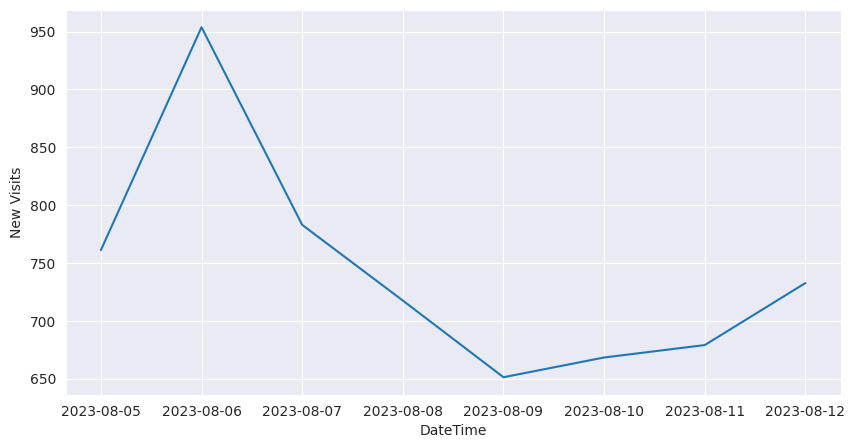

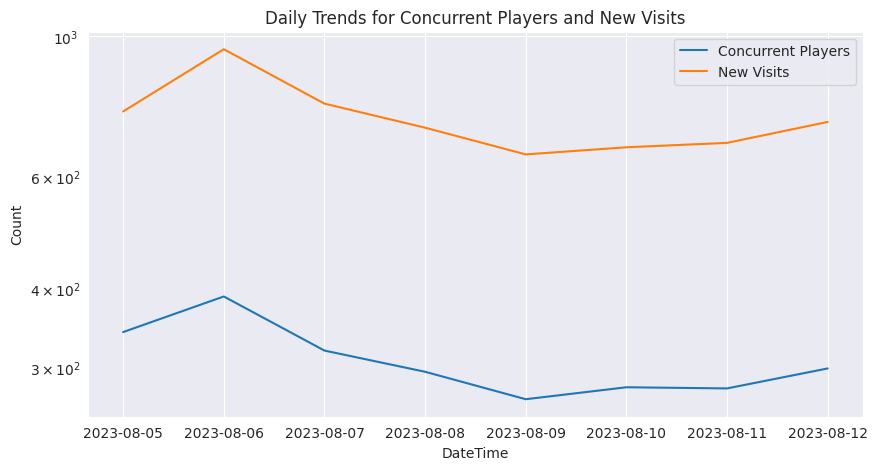

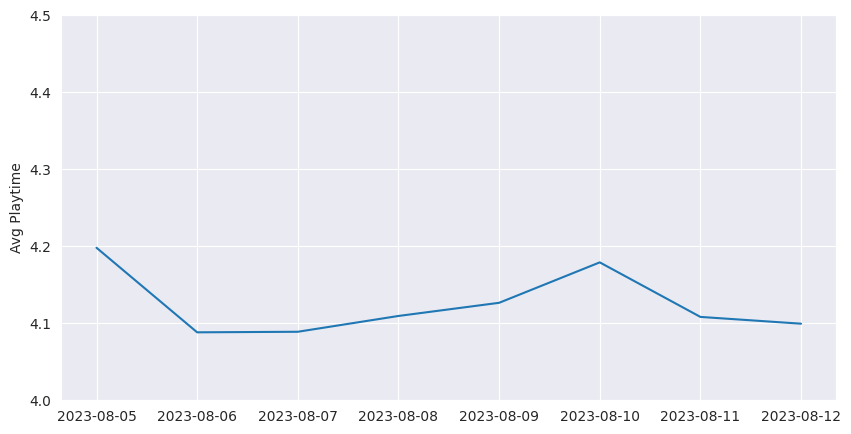

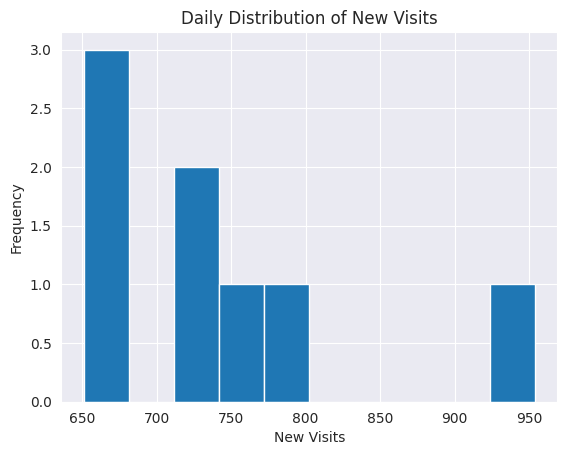

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 13 00:54:22 2023
@author: sayonee
"""
'''
EMV metric demonstration for overall player understanding '''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('darkgrid')

''' Load data '''

# Load and convert 'DateTime' columns to datetime data type
playtime = pd.read_csv(r"/content/average-playtime.csv")
playtime['DateTime'] = pd.to_datetime(playtime['DateTime'])

concurrent = pd.read_csv(r"/content/concurrent-players.csv")
concurrent['DateTime'] = pd.to_datetime(concurrent['DateTime'])

likepercent = pd.read_csv(r"/content/like-percent.csv")
likepercent['DateTime'] = pd.to_datetime(likepercent['DateTime'])

new_fav = pd.read_csv(r"/content/new-favorites.csv")
new_fav['DateTime'] = pd.to_datetime(new_fav['DateTime'])

new_likes = pd.read_csv(r"/content/new-likes.csv")
new_likes['DateTime'] = pd.to_datetime(new_likes['DateTime'])

new_visits = pd.read_csv(r"/content/new-visits.csv")
new_visits['DateTime'] = pd.to_datetime(new_visits['DateTime'])

# Load and convert 'DateTime' columns to datetime data type daily
playtime_hourly = pd.read_csv(r"/content/average-playtime_hourly.csv")
playtime_hourly['DateTime'] = pd.to_datetime(playtime['DateTime'])

concurrent_hourly = pd.read_csv(r"/content/concurrent-players_hourly.csv")
concurrent_hourly['DateTime'] = pd.to_datetime(concurrent['DateTime'])

likepercent_hourly= pd.read_csv(r"/content/like-percent_hourly.csv")
likepercent_hourly['DateTime'] = pd.to_datetime(likepercent['DateTime'])

new_fav_hourly = pd.read_csv(r"/content/new-favorites_hourly.csv")
new_fav_hourly['DateTime'] = pd.to_datetime(new_fav['DateTime'])

new_likes_hourly = pd.read_csv(r"/content/new-likes_hourly.csv")
new_likes_hourly['DateTime'] = pd.to_datetime(new_likes['DateTime'])

new_visits_hourly = pd.read_csv(r"/content/new-visits_hourly.csv")
new_visits_hourly['DateTime'] = pd.to_datetime(new_visits['DateTime'])



# Load and convert 'DateTime' columns to datetime data type for daily
playtime_daily = pd.read_csv(r"/content/average-playtime_daily.csv")
playtime_daily['DateTime'] = pd.to_datetime(playtime['DateTime'])

concurrent_daily = pd.read_csv(r"/content/concurrent-players_daily.csv")
concurrent_daily['DateTime'] = pd.to_datetime(concurrent['DateTime'])

likepercent_daily= pd.read_csv(r"/content/like-percent_daily.csv")
likepercent_daily['DateTime'] = pd.to_datetime(likepercent['DateTime'])

new_fav_daily = pd.read_csv(r"/content/new-favorites_daily.csv")
new_fav_daily['DateTime'] = pd.to_datetime(new_fav['DateTime'])

new_likes_daily = pd.read_csv(r"/content/new-likes_daily.csv")
new_likes_daily['DateTime'] = pd.to_datetime(new_likes['DateTime'])

new_visits_daily = pd.read_csv(r"/content/new-visits_daily.csv")
new_visits_daily['DateTime'] = pd.to_datetime(new_visits['DateTime'])


# Merge and process dataframes
merged_playerdf = playtime.merge(concurrent, on='DateTime')
merged_playerdf = merged_playerdf.merge(likepercent, on='DateTime')
merged_playerdf = merged_playerdf.merge(new_fav, on='DateTime', how='left')
merged_playerdf = merged_playerdf.merge(new_likes, on='DateTime', how='left')
merged_playerdf = merged_playerdf.merge(new_visits, on='DateTime', how='left')

# Merge and process dataframes for hourly data
merged_playerdf_hourly = playtime_hourly.merge(concurrent_hourly, on='DateTime')
merged_playerdf_hourly = merged_playerdf_hourly.merge(likepercent_hourly, on='DateTime')
merged_playerdf_hourly = merged_playerdf_hourly.merge(new_fav_hourly, on='DateTime', how='left')
merged_playerdf_hourly = merged_playerdf_hourly.merge(new_likes_hourly, on='DateTime', how='left')
merged_playerdf_hourly = merged_playerdf_hourly.merge(new_visits_hourly, on='DateTime', how='left')

# Merge and process dataframes for daily data
merged_playerdf_daily = playtime_daily.merge(concurrent_daily, on='DateTime')
merged_playerdf_daily = merged_playerdf_daily.merge(likepercent_daily, on='DateTime')
merged_playerdf_daily = merged_playerdf_daily.merge(new_fav_daily, on='DateTime', how='left')
merged_playerdf_daily = merged_playerdf_daily.merge(new_likes_daily, on='DateTime', how='left')
merged_playerdf_daily = merged_playerdf_daily.merge(new_visits_daily, on='DateTime', how='left')


print('processing')
# Process DateTime after merging
merged_playerdf = merged_playerdf.set_index('DateTime')

# Display the original 'DateTime' values
print("Original 'DateTime' values:")
print(merged_playerdf['New Visits'].head())

# Daily distribution
merged_playerdf['New Visits'].hist(bins=20)
plt.title('Daily Distribution of New Visits')
plt.xlabel('New Visits')
plt.ylabel('Frequency')
plt.show()

print(merged_playerdf)
print('duplicated rows')
print('last')
print(merged_playerdf.duplicated(keep='first'))  # no duplicates were found
print(merged_playerdf.head())


print('resampled')
# Resample and plot using this index
merged_playerdf_resampled = merged_playerdf.resample('D').mean()
merged_playerdf_resampled['Players'].plot(title='Concurrent Players')

print("Concurrent Players:")
print(merged_playerdf_resampled[['Players']].head())

print("New Players:")
print(merged_playerdf_resampled[['New Visits']].head())



#EMV Analysis
# Extract date
# Convert to string in desired format
# Concurrent players time series

# Plot daily trends from original data
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_playerdf_resampled, x=merged_playerdf_resampled.index, y='New Visits')

#extracting the date

date_str = merged_playerdf_resampled.index.date.astype(str)
# Daily aggregates
daily = merged_playerdf_resampled.groupby(date_str).agg({
    'New Visits': 'sum',
    'Like Percent': 'mean',
    'Players': 'max',
    'Avg Playtime': 'mean',
    'New Likes': 'sum',
    'New Dislikes': 'sum'
})

# Cumulative sum
daily['Total_Visits'] = daily['New Visits'].cumsum()

# Monthly uniques
monthly_uniques = daily['Total_Visits'].iloc[-1]
print('head:')
print(daily.head())
print(monthly_uniques)
print('daily trend')
# Daily trends plot

# Plot daily trends for Concurrent Players
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_playerdf_resampled, x=merged_playerdf_resampled.index, y='Players', label='Concurrent Players')

# Plot daily trends for New Visits
sns.lineplot(data=merged_playerdf_resampled, x=merged_playerdf_resampled.index, y='New Visits', label='New Visits')

plt.title('Daily Trends for Concurrent Players and New Visits')
plt.ylabel('Count')
plt.yscale('log')  # Using log scale for better visualization of varying values
plt.legend()
plt.show()
# Zoomed playtime plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(4, 4.5)
sns.lineplot(data=daily, x=daily.index, y='Avg Playtime')
plt.show()  # Don't forget to add this to display the plots

'''
# Daily distribution
'''
daily['New Visits'].hist()
plt.title('Daily Distribution of New Visits')
plt.xlabel('New Visits')
plt.ylabel('Frequency')
plt.show()


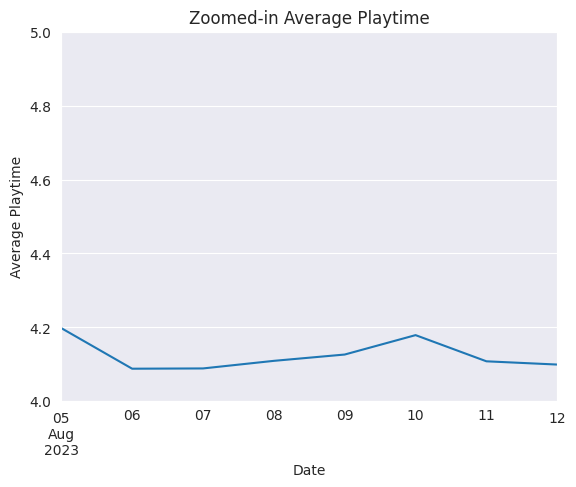

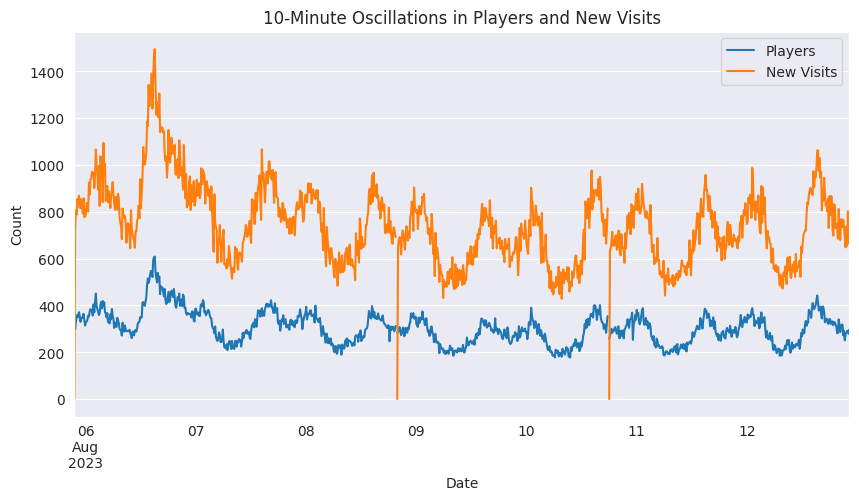

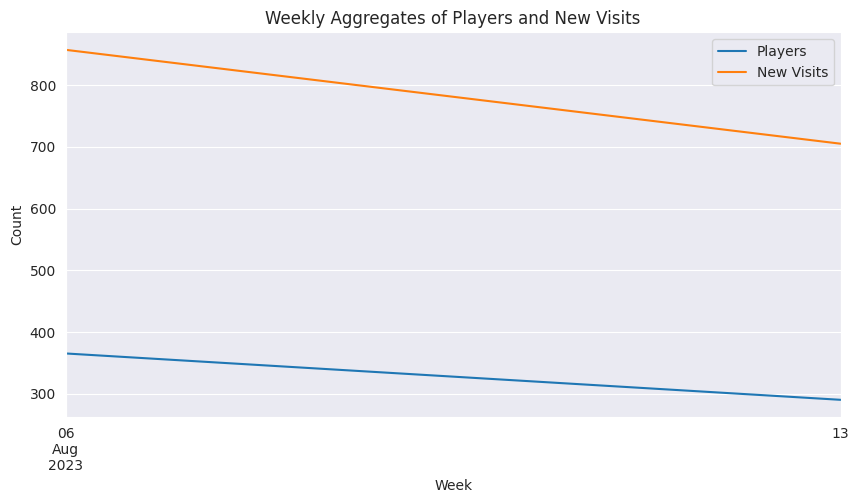

In [ ]:
# Resample data to weekly
weekly_data = merged_playerdf.resample('W')

# Aggregate metrics
weekly_data = weekly_data.agg({'Players':'mean',
                                'New Visits':'sum',
                                'Avg Playtime':'mean'})

# Plot average playtime in a separate zoomed-in chart
fig, ax = plt.subplots()
ax.set_ylim(4, 5)  # Zoomed y-axis range
merged_playerdf_resampled['Avg Playtime'].plot(ax=ax)
plt.title('Zoomed-in Average Playtime')
plt.xlabel('Date')
plt.ylabel('Average Playtime')
plt.show()

# Resample the detailed data to 10 min intervals
tenmin_data = merged_playerdf.resample('10T').mean()

# Plot 10 min oscillations in players and visits
fig, ax = plt.subplots(figsize=(10, 5))
tenmin_data['Players'].plot(ax=ax, label='Players')
tenmin_data['New Visits'].plot(ax=ax, label='New Visits')
plt.title('10-Minute Oscillations in Players and New Visits')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plot the weekly aggregates on a separate graph
weekly_data = merged_playerdf_resampled.resample('W').mean()
fig, ax = plt.subplots(figsize=(10, 5))
weekly_data.plot(y=['Players', 'New Visits'], ax=ax)
plt.title('Weekly Aggregates of Players and New Visits')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.show()

# ... (remaining code)




In [ ]:
monthly_dau = merged_playerdf_resampled['Players'].mean()
impressions_per_min = 5 # Assumption
monthly_playtime = merged_playerdf_resampled['Avg Playtime'].sum() * 60
monthly_impressions = impressions_per_min * monthly_playtime * monthly_dau
cpm = 10 # assuming $10 CPM as per: https://www.metaversemarcom.io/post/top-10-roblox-brand-games-july-23
monthly_emv = monthly_impressions * cpm / 1000
print("Monthly Average DAU:", monthly_dau)
print("Monthly Impressions:", monthly_impressions)
print("Monthly EMV:", monthly_emv)


Monthly Average DAU: 309.0137678872054
Monthly Impressions: 3059072.0053143823
Monthly EMV: 30590.72005314382


Impressions for first 5 hours:
DateTime
2023-08-05 21:00:00    3.525329e+06
2023-08-05 22:00:00    1.614077e+07
2023-08-05 23:00:00    1.556702e+07
2023-08-06 00:00:00    1.562528e+07
2023-08-06 01:00:00    1.631104e+07
Freq: H, dtype: float64
EMV for first 5 hours:
DateTime
2023-08-05 21:00:00     35253.28602
2023-08-05 22:00:00    161407.72635
2023-08-05 23:00:00    155670.23628
2023-08-06 00:00:00    156252.75435
2023-08-06 01:00:00    163110.38688
Freq: H, dtype: float64


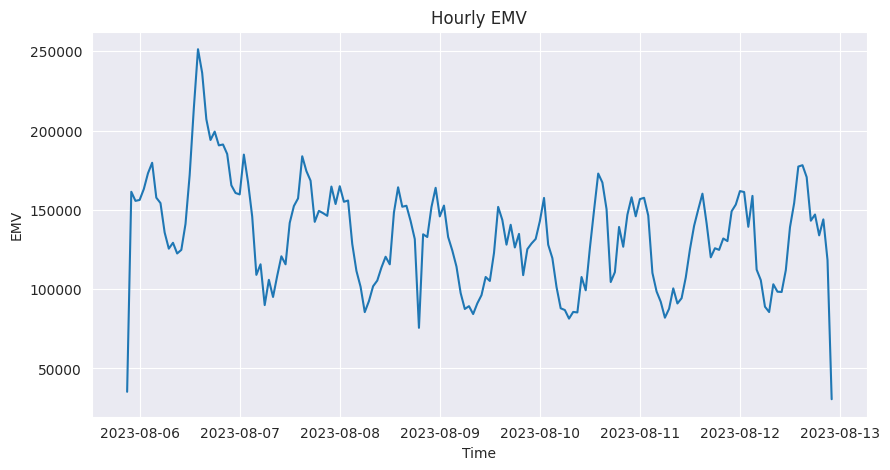

In [ ]:
# Resample to hourly and compute EMV
hourly_data = merged_playerdf.resample('H').sum()  # Resample to hourly and sum the data
hourly_impressions = impressions_per_min * 60 * hourly_data['Players'] * hourly_data['Avg Playtime']
hourly_emv = hourly_impressions * cpm / 1000
print("Impressions for first 5 hours:")
print(hourly_impressions.head(5))
print("EMV for first 5 hours:")
print(hourly_emv.head(5))
# Visualize hourly EMV over time
plt.figure(figsize=(10, 5))
plt.plot(hourly_data.index, hourly_emv)
plt.title('Hourly EMV')
plt.xlabel('Time')
plt.ylabel('EMV')
plt.show()


In [ ]:
!pip install mpld3
import matplotlib.pyplot as plt # For plotting
import mpld3
from mpld3 import plugins # For tooltips
# Plot hourly EMV
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(hourly_data.index, hourly_emv)

# Generate tooltips for 2 data points
tooltip = mpld3.plugins.PointHTMLTooltip([hourly_data.index[0], hourly_data.index[15]],
                                         [hourly_emv[0], hourly_emv[15]],
                                         voffset=10, hoffset=10)
mpld3.plugins.connect(fig, tooltip)

# Plot config
ax.set_title('Hourly EMV')
ax.set_xlabel('Time')
ax.set_ylabel('EMV')

# Show plot
mpld3.display()



In [ ]:
# Segment users based on playtime ranges
playtime_bins = [0, 2, 4, 6, float('inf')]  # Define your own playtime ranges
merged_playerdf['Playtime Group'] = pd.cut(merged_playerdf['Avg Playtime'], bins=playtime_bins, labels=['Short', 'Medium', 'Long', 'Very Long'])

# Compute EMV for each playtime group
playtime_emv = merged_playerdf.groupby('Playtime Group').agg({
    'Players': 'max',
    'Avg Playtime': 'mean',
    'New Visits': 'sum'
})

playtime_emv['Playtime Impressions'] = impressions_per_min * playtime_emv['Players'] * playtime_emv['Avg Playtime']
playtime_emv['Playtime EMV'] = playtime_emv['Playtime Impressions'] * cpm / 1000

# Plot EMV by playtime group
plt.figure(figsize=(10, 5))
playtime_emv['Playtime EMV'].plot(kind='bar')
plt.title('EMV by Playtime Group')
plt.xlabel('Playtime Group')
plt.ylabel('EMV')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Process DateTime after merging
merged_playerdf.index = pd.to_datetime(merged_playerdf.index)

# Resample the detailed data to hourly intervals
merged_playerdf_hourly_resampled = merged_playerdf.resample('H').mean()

# Resample the detailed data to daily intervals
merged_playerdf_daily_resampled = merged_playerdf.resample('D').mean()

# EMV constants
impressions_per_min = 5
cpm = 10

# Calculate EMV for each granularity
def calculate_emv(df):
    monthly_dau = df['Players'].mean()
    monthly_playtime = df['Avg Playtime'].sum() * 60
    monthly_impressions = impressions_per_min * monthly_playtime * monthly_dau
    monthly_emv = monthly_impressions * cpm / 1000
    return monthly_emv

# Calculate EMVs
monthly_emv_10min = calculate_emv(merged_playerdf)
monthly_emv_hourly = calculate_emv(merged_playerdf_hourly_resampled)
monthly_emv_daily = calculate_emv(merged_playerdf_daily_resampled)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 10-Minute Data
merged_playerdf_resampled['Players'].plot(ax=axes[0, 0], title='Concurrent Players (10-Minute)')
merged_playerdf_resampled['New Visits'].plot(ax=axes[0, 0])
axes[0, 0].set_ylabel('Count')

# Hourly Data
merged_playerdf_hourly_resampled['Players'].plot(ax=axes[0, 1], title='Concurrent Players (Hourly)')
merged_playerdf_hourly_resampled['New Visits'].plot(ax=axes[0, 1])
axes[0, 1].set_ylabel('Count')

# Daily Data
merged_playerdf_daily_resampled['Players'].plot(ax=axes[1, 0], title='Concurrent Players (Daily)')
merged_playerdf_daily_resampled['New Visits'].plot(ax=axes[1, 0])
axes[1, 0].set_ylabel('Count')

# EMV Comparison
emv_data = {'Granularity': ['10-Minute', 'Hourly', 'Daily'],
            'EMV': [monthly_emv_10min, monthly_emv_hourly, monthly_emv_daily]}
emv_df = pd.DataFrame(emv_data)
sns.barplot(data=emv_df, x='Granularity', y='EMV', ax=axes[1, 1])
axes[1, 1].set_title('EMV Comparison')
axes[1, 1].set_ylabel('EMV')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Calculate EMVs based on average playtime
def calculate_emv_with_playtime(df):
    monthly_dau = df['Players'].mean()
    monthly_avg_playtime = df['Avg Playtime'].mean() * 60  # Convert to seconds
    monthly_impressions = impressions_per_min * monthly_avg_playtime * monthly_dau
    monthly_emv = monthly_impressions * cpm / 1000
    return monthly_emv


# Calculate EMVs with average playtime
monthly_emv_10min_with_playtime = calculate_emv_with_playtime(merged_playerdf)
monthly_emv_hourly_with_playtime = calculate_emv_with_playtime(merged_playerdf_hourly_resampled)
monthly_emv_daily_with_playtime = calculate_emv_with_playtime(merged_playerdf_daily_resampled)
# Create EMV DataFrame for plotting with average playtime
emv_data_with_playtime = {'Granularity': ['10-Minute', 'Hourly', 'Daily'],
                          'EMV': [monthly_emv_10min_with_playtime, monthly_emv_hourly_with_playtime, monthly_emv_daily_with_playtime]}
emv_df_with_playtime = pd.DataFrame(emv_data_with_playtime)
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 10-Minute Data
merged_playerdf_resampled['Players'].plot(ax=axes[0, 0], title='Concurrent Players (10-Minute)')
merged_playerdf_resampled['New Visits'].plot(ax=axes[0, 0])
axes[0, 0].set_ylabel('Count')

# Hourly Data
merged_playerdf_hourly_resampled['Players'].plot(ax=axes[0, 1], title='Concurrent Players (Hourly)')
merged_playerdf_hourly_resampled['New Visits'].plot(ax=axes[0, 1])
axes[0, 1].set_ylabel('Count')

# Daily Data
merged_playerdf_daily_resampled['Players'].plot(ax=axes[1, 0], title='Concurrent Players (Daily)')
merged_playerdf_daily_resampled['New Visits'].plot(ax=axes[1, 0])
axes[1, 0].set_ylabel('Count')

# EMV Comparison
sns.barplot(data=emv_df_with_playtime, x='Granularity', y='EMV', ax=axes[1, 1])
axes[1, 1].set_title('EMV Comparison (Based on Average Playtime)')
axes[1, 1].set_ylabel('EMV')

# Add EMV labels to the bar plot
for index, row in emv_df_with_playtime.iterrows():
    axes[1, 1].text(index, row['EMV'], f"${row['EMV']:.2f}", ha='center', va='bottom')

# Set y-axis range to highlight differences
axes[1, 1].set_ylim(min(emv_df_with_playtime['EMV']) - 5, max(emv_df_with_playtime['EMV']) + 5)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge the new datasets (replace 'path_to_dataset' with actual paths)
fps_data_10 = pd.read_csv(r'/content/server-fps.csv')
ping_data_10= pd.read_csv(r'/content/server-ping.csv')
players_per_server_data_10 = pd.read_csv(r'/content/players-per-server.csv')
server_count_data_10 = pd.read_csv(r'/content/servers.csv')

# Rename columns to avoid conflicts
fps_data_10 = fps_data_10.rename(columns={'Average': 'FPS_Average'})
ping_data_10 = ping_data_10.rename(columns={'Average': 'Ping_Average'})
players_per_server_data_10 = players_per_server_data_10.rename(columns={'Average': 'PlayersPerServer_Average'})
server_count_data_10 = server_count_data_10.rename(columns={'Average': 'ServerCount_Average'})

# Merge the new datasets with existing dataframes (adjust 'on' parameter as needed)
merged_serverdf_10 = fps_data_10.merge(ping_data_10, on='DateTime')
merged_serverdf_10 = merged_serverdf_10.merge(players_per_server_data_10, on='DateTime')
merged_serverdf_10 = merged_serverdf_10.merge(server_count_data_10, on='DateTime')
print('10 minute')
print(merged_serverdf_10.head())
# Load and merge the new datasets hourly
fps_data_hourly = pd.read_csv(r'/content/servers (1).csv')
ping_data_hourly= pd.read_csv(r'/content/server-ping (1).csv')
players_per_server_data_hourly = pd.read_csv(r'/content/players-per-server (1).csv')
server_count_data_hourly = pd.read_csv(r'/content/servers (1).csv')

# Rename columns to avoid conflicts for hourly datasets
fps_data_hourly = fps_data_hourly.rename(columns={'Average': 'FPS_Average'})
ping_data_hourly = ping_data_hourly.rename(columns={'Average': 'Ping_Average'})
players_per_server_data_hourly = players_per_server_data_hourly.rename(columns={'Average': 'PlayersPerServer_Average'})
server_count_data_hourly = server_count_data_hourly.rename(columns={'Average': 'ServerCount_Average'})

# Merge the new datasets with existing dataframes for hourly
merged_serverdf_hourly = fps_data_hourly.merge(ping_data_hourly, on='DateTime')
merged_serverdf_hourly = merged_serverdf_hourly.merge(players_per_server_data_hourly, on='DateTime')
merged_serverdf_hourly = merged_serverdf_hourly.merge(server_count_data_hourly, on='DateTime')
print('hourly')
print(merged_serverdf_hourly.head())
# Load and merge the new datasets daily
fps_data_daily = pd.read_csv(r'/content/servers (2).csv')
ping_data_daily = pd.read_csv(r'/content/server-ping (2).csv')
players_per_server_data_daily = pd.read_csv(r'/content/players-per-server (2).csv')
server_count_data_daily = pd.read_csv(r'/content/servers (2).csv')

# Rename columns to avoid conflicts for daily datasets
fps_data_daily = fps_data_daily.rename(columns={'Average': 'FPS_Average'})
ping_data_daily = ping_data_daily.rename(columns={'Average': 'Ping_Average'})
players_per_server_data_daily = players_per_server_data_daily.rename(columns={'Average': 'PlayersPerServer_Average'})
server_count_data_daily = server_count_data_daily.rename(columns={'Average': 'ServerCount_Average'})

# Merge the new datasets with existing dataframes for daily
merged_serverdf_daily = fps_data_daily.merge(ping_data_daily, on='DateTime')
merged_serverdf_daily = merged_serverdf_daily.merge(players_per_server_data_daily, on='DateTime')
merged_serverdf_daily = merged_serverdf_daily.merge(server_count_data_daily, on='DateTime')
print('daily')
print(merged_serverdf_daily.head())


In [ ]:
# Define weights for each factor
weight_players = 0.5
weight_fps = 0.2
weight_ping = 0.2
weight_server_count = 0.1

# Calculate exposure for each 10-minute interval, hourly, and daily
merged_serverdf_10['Exposure'] = (
    merged_serverdf_10['PlayersPerServer_Average'] * weight_players +
    merged_serverdf_10['FPS_Average'] * weight_fps +
    merged_serverdf_10['Ping_Average'] * weight_ping +
    merged_serverdf_10['Server Count'] * weight_server_count
)

merged_serverdf_hourly['Exposure'] = (
    merged_serverdf_hourly['PlayersPerServer_Average'] * weight_players +
    merged_serverdf_hourly['Ping_Average'] * weight_ping +
    merged_serverdf_hourly['Server Count_y'] * weight_server_count
)

merged_serverdf_daily['Exposure'] = (
    merged_serverdf_daily['PlayersPerServer_Average'] * weight_players +
    merged_serverdf_daily['Ping_Average'] * weight_ping +
    merged_serverdf_daily['Server Count_y'] * weight_server_count
)

# Sum up the exposures for each interval to get total exposure for July 2023
total_exposure_10 = merged_serverdf_10['Exposure'].sum()
total_exposure_hourly = merged_serverdf_hourly['Exposure'].sum()
total_exposure_daily = merged_serverdf_daily['Exposure'].sum()

# Estimate the EMV based on comparison with paid advertising cost
# You might need to adjust the conversion_factor based on your industry standards
conversion_factor = 0.1  # Example conversion factor
estimated_emv_10 = total_exposure_10 * conversion_factor
estimated_emv_hourly = total_exposure_hourly * conversion_factor
estimated_emv_daily = total_exposure_daily * conversion_factor

print("Estimated EMV for 10-minute interval: ${:.2f}".format(estimated_emv_10))
print("Estimated EMV for hourly: ${:.2f}".format(estimated_emv_hourly))
print("Estimated EMV for daily: ${:.2f}".format(estimated_emv_daily))


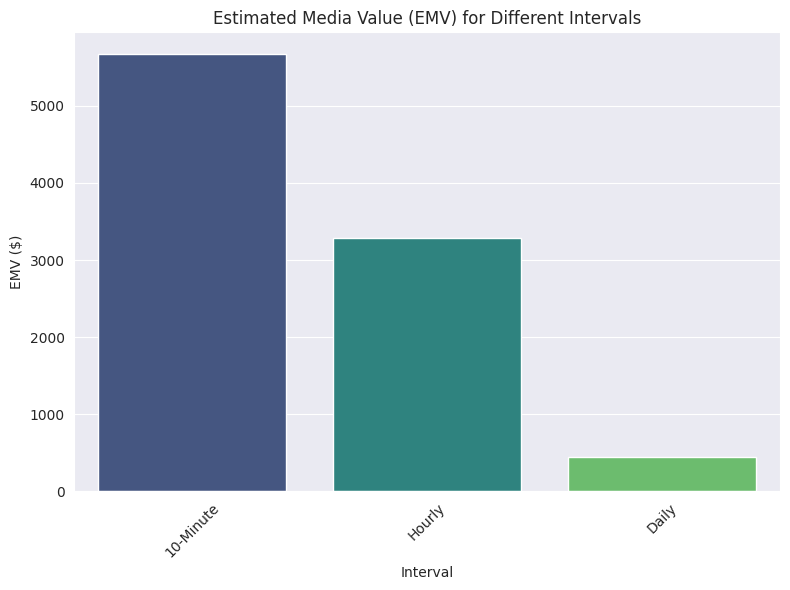

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define interval names
interval_names = ['10-Minute', 'Hourly', 'Daily']

# Calculate EMV for each interval
emv_values = [estimated_emv_10, estimated_emv_hourly, estimated_emv_daily]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=interval_names, y=emv_values, palette='viridis')
plt.title("Estimated Media Value (EMV) for Different Intervals")
plt.xlabel("Interval")
plt.ylabel("EMV ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Create line plots for Concurrent Players and New Visits
line_fig = go.Figure()
line_fig.add_trace(go.Scatter(x=merged_playerdf_resampled.index, y=merged_playerdf_resampled['Players'], name='Concurrent Players'))
line_fig.add_trace(go.Scatter(x=merged_playerdf_resampled.index, y=merged_playerdf_resampled['New Visits'], name='New Visits'))
line_fig.update_layout(
    title='Concurrent Players and New Visits Trends',
    xaxis_title='Date',
    yaxis_title='Count'
)

# Create a bar plot for EMV Comparison
emv_fig = go.Figure()
emv_fig.add_trace(go.Bar(x=emv_df['Granularity'], y=emv_df['EMV'], text=emv_df['EMV'], textposition='auto'))
emv_fig.update_layout(
    title='Estimated Media Value (EMV) Comparison',
    xaxis_title='Interval',
    yaxis_title='EMV ($)'
)

# Create a subplot layout
fig = make_subplots(rows=1, cols=2, subplot_titles=['Trends', 'EMV Comparison'])
fig.add_trace(line_fig['data'][0], row=1, col=1)
fig.add_trace(line_fig['data'][1], row=1, col=1)
fig.add_trace(emv_fig['data'][0], row=1, col=2)

# Update layout and show the dashboard
fig.update_layout(
    title='NHL Blast on Roblox Dashboard',
    showlegend=False
)
fig.show()


In [ ]:
# Create line plots for Concurrent Players and New Visits
line_fig = go.Figure()
line_fig.add_trace(go.Scatter(x=merged_playerdf_resampled.index, y=merged_playerdf_resampled['Players'], name='Concurrent Players'))
line_fig.add_trace(go.Scatter(x=merged_playerdf_resampled.index, y=merged_playerdf_resampled['New Visits'], name='New Visits'))
line_fig.update_layout(
    title='Concurrent Players and New Visits Trends',
    xaxis_title='Date',
    yaxis_title='Count'
)

# Create a stacked bar plot for EMV Comparison
emv_fig = go.Figure()
emv_fig.add_trace(go.Bar(x=emv_df['Granularity'], y=emv_df['EMV'], name='EMV', marker_color=['#1f77b4', '#ff7f0e', '#2ca02c']))
emv_fig.update_layout(
    title='Estimated Media Value (EMV) Comparison',
    xaxis_title='Interval',
    yaxis_title='EMV ($)',
    barmode='stack'
)

# Create a subplot layout
fig = make_subplots(rows=1, cols=2, subplot_titles=['Trends', 'EMV Comparison'])
fig.add_trace(line_fig['data'][0], row=1, col=1)
fig.add_trace(line_fig['data'][1], row=1, col=1)
fig.add_trace(emv_fig['data'][0], row=1, col=2)

# Update layout and show the dashboard
fig.update_layout(
    title='NHL Blast on Roblox Dashboard',
    showlegend=False
)
fig.show()
# Save the figure to an HTML file
go.FigureWidget(fig).write_html('dashboard.html')
!pip install pyftp
import pyftp

ftp = pyftp.FTP('example.com')
ftp.login('username', 'password')

with open('dashboard.html', 'rb') as f:
  ftp.storlines('STOR dashboard.html', f)

ftp.quit()


OSError: ignored